# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | motueka
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | james island
City not found. Skipping...
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | kosh-agach
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | kourou
Processing Record 21 of Set 1 | hawaiian paradise park

Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | holualoa
Processing Record 41 of Set 4 | mayya
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | zhezqazghan
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | uturoa
Processing Record 47 of Set 4 | golere
Processing Record 48 of Set 4 | holmestrand
Processing Record 49 of Set 4 | serenje
Processing Record 0 of Set 5 | terme
Processing Record 1 of Set 5 | nhandeara
Processing Record 2 of Set 5 | al mijlad
Processing Record 3 of Set 5 | ouesso
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | la passe
Processing Record 6 of Set 5 | newman
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | freeport
Processing Record 9 of Set 5 | santiago de cuba
Processing Record 10 of Set 5 | olonkinbyen
Processing Record 11 of Set 5 | emerald
Processing Record 12 of Set 5 | jamestown
Processing Recor

Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | mooloolaba
Processing Record 31 of Set 8 | san sebastian de la gomera
Processing Record 32 of Set 8 | ugoofaaru
Processing Record 33 of Set 8 | bayganin
Processing Record 34 of Set 8 | xai-xai
Processing Record 35 of Set 8 | pont rouge
Processing Record 36 of Set 8 | sedalia
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | el calafate
Processing Record 39 of Set 8 | torghay
Processing Record 40 of Set 8 | taiyuan
Processing Record 41 of Set 8 | san julian
Processing Record 42 of Set 8 | porto murtinho
Processing Record 43 of Set 8 | morahalom
Processing Record 44 of Set 8 | tidjikja
Processing Record 45 of Set 8 | shengli
Processing Record 46 of Set 8 | kalundborg
Processing Record 47 of Set 8 | kingsbridge
Processing Record 48 of Set 8 | batticaloa
Processing Record 49 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 9 | diu
Processing Record 1 of Set 9 | pan

Processing Record 22 of Set 12 | shibetsu
Processing Record 23 of Set 12 | puerto baquerizo moreno
Processing Record 24 of Set 12 | axim
Processing Record 25 of Set 12 | hithadhoo
Processing Record 26 of Set 12 | nambucca
Processing Record 27 of Set 12 | kupang
Processing Record 28 of Set 12 | oriximina
Processing Record 29 of Set 12 | bahua
Processing Record 30 of Set 12 | itapage
Processing Record 31 of Set 12 | xinyuan
Processing Record 32 of Set 12 | boa vista
Processing Record 33 of Set 12 | rondonopolis
Processing Record 34 of Set 12 | tralee
Processing Record 35 of Set 12 | weyburn
Processing Record 36 of Set 12 | karkira
Processing Record 37 of Set 12 | ascension
Processing Record 38 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 39 of Set 12 | turpan
Processing Record 40 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 41 of Set 12 | tam ky
Processing Record 42 of Set 12 | pilar
Processing Record 43 of Set 12 | coxen hole
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,22.99,74,73,6.79,MU,1690161248
1,adamstown,-25.0660,-130.1015,20.63,70,100,8.30,PN,1690161248
2,port-aux-francais,-49.3500,70.2167,5.78,93,100,16.75,TF,1690161248
3,whitehorse,60.7161,-135.0538,15.43,88,100,1.54,CA,1690161248
4,pisco,-13.7000,-76.2167,22.03,60,100,3.60,PE,1690161223


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,22.99,74,73,6.79,MU,1690161248
1,adamstown,-25.0660,-130.1015,20.63,70,100,8.30,PN,1690161248
2,port-aux-francais,-49.3500,70.2167,5.78,93,100,16.75,TF,1690161248
3,whitehorse,60.7161,-135.0538,15.43,88,100,1.54,CA,1690161248
4,pisco,-13.7000,-76.2167,22.03,60,100,3.60,PE,1690161223


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

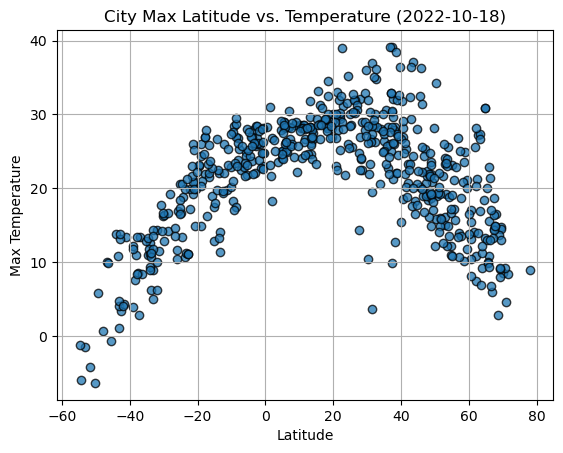

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Create a scatter plot for latitude vs max temperature.

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

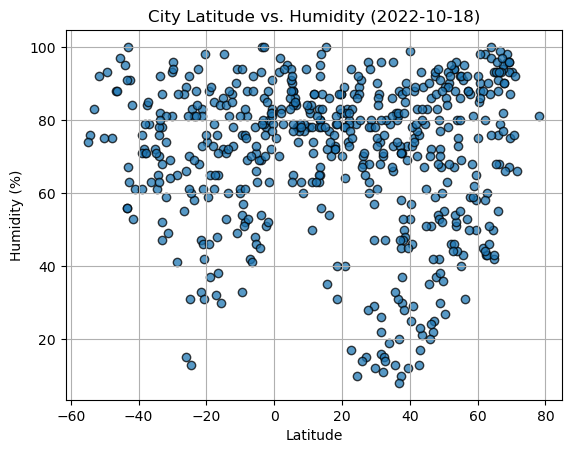

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

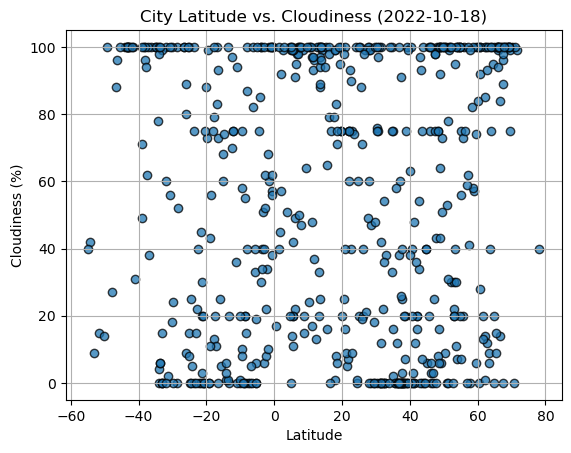

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

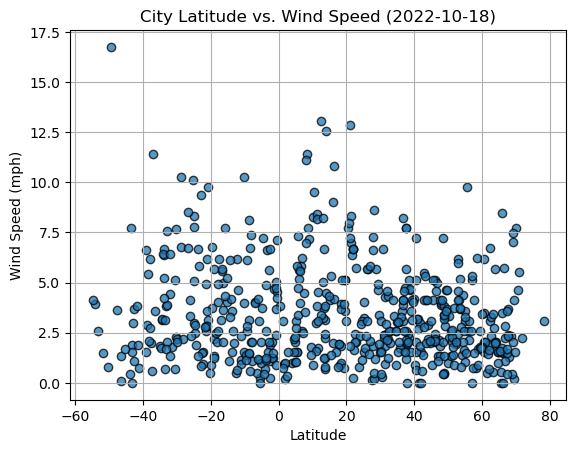

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    #plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.scatter(x_values, y_values, c='#4B9DDB', edgecolors="#4B9DDB")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the line on the plot in the middle
    x_range = max(x_values) - min(x_values)
    y_range = max(y_values) - min(y_values)
    x_text = min(x_values) + x_range * 0.4
    y_text = min(y_values) + y_range * 0.1
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_text, y_text), fontsize=12, color="red", ha='right', va='bottom')
    
    # Add labels and title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    r_text = f"r = {r_value:.2f}"
    
    print(r_text)
    # Save the figure
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,whitehorse,60.7161,-135.0538,15.43,88,100,1.54,CA,1690161248
5,wailua homesteads,22.0669,-159.3780,29.44,80,75,6.69,US,1690161249
8,vilyuchinsk,52.9306,158.4028,24.15,67,22,6.16,RU,1690161250
9,georgetown,5.4112,100.3354,28.96,88,20,1.54,MY,1690161250
10,san patricio,28.0170,-97.5169,32.05,63,100,8.64,US,1690161251


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,22.99,74,73,6.79,MU,1690161248
1,adamstown,-25.0660,-130.1015,20.63,70,100,8.30,PN,1690161248
2,port-aux-francais,-49.3500,70.2167,5.78,93,100,16.75,TF,1690161248
4,pisco,-13.7000,-76.2167,22.03,60,100,3.60,PE,1690161223
6,waitangi,-43.9535,-176.5597,13.79,95,100,0.45,NZ,1690161249


###  Temperature vs. Latitude Linear Regression Plot

r = -0.62


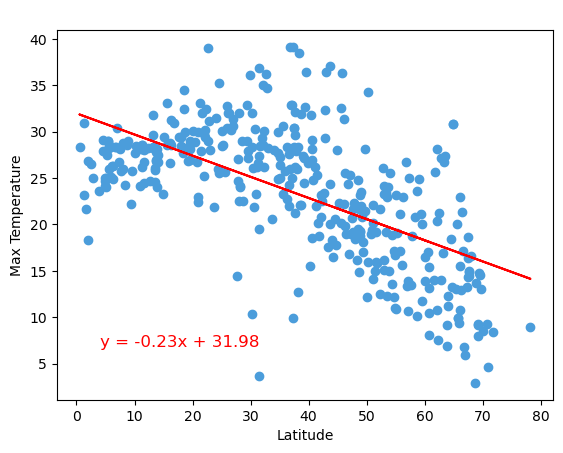

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature"," ", "../output_data/Northern_Hemi_Temp_vs_Latitude.png")

r = 0.87


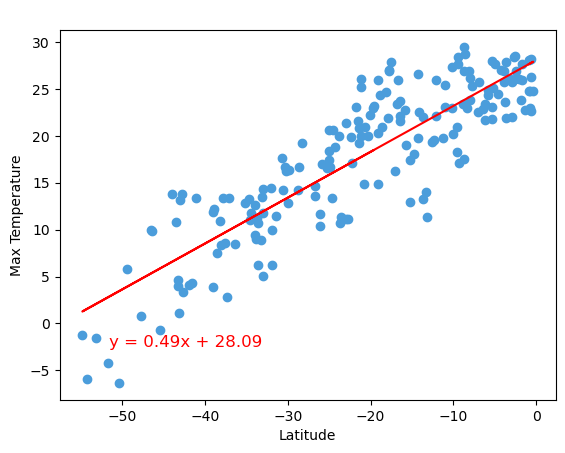

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", " ", "../output_data/Southern_Hemi_Temp_vs_Latitude.png")

**Discussion about the linear relationship:** Both relationships are already more remarkable, first in the northern hemisphere is an inverse correlation between temperature and latitude. Specifically, as we move towards higher latitudes (closer to the North Pole), the temperature tends to decrease. In the case of the Southern Hemisphere, the correlation coefficient is high since it is close to 1, so it is a strong and positive correlation, which indicates that there is an increase in temperature the closer we get to the equator.

### Humidity vs. Latitude Linear Regression Plot

r = -0.04


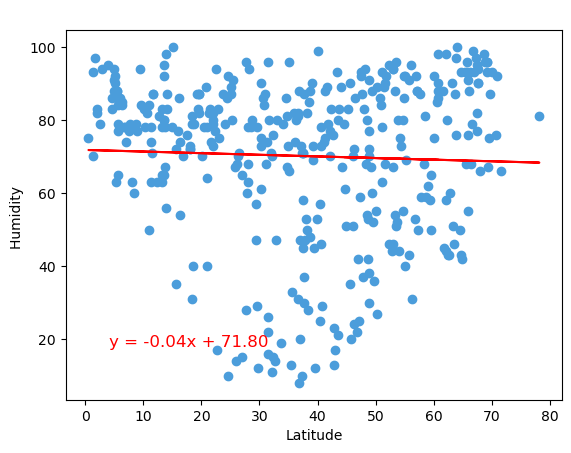

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity ", " ", "../output_data/Northern_Hemi_Humidity_vs_Latitude.png")

r = -0.08


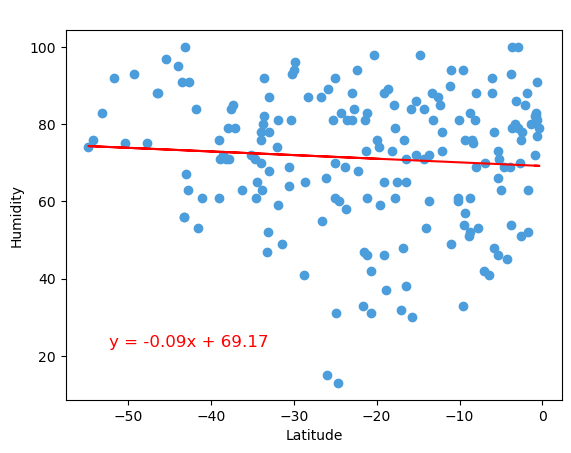

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", " ", "../output_data/Southern_Hemi_Humidity_vs_Latitude.png")

**Discussion about the linear relationship:** In both there is a very low inverse correlation, close to -0.1, that is, very far from 1 or -1, which is a weak inverse correlation, therefore there is no significant linear relationship between humidity and latitude in both hemispheres, it is a practically null correlation and it is not strong enough to be a reliable predictor of humidity based solely on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

r = -0.00


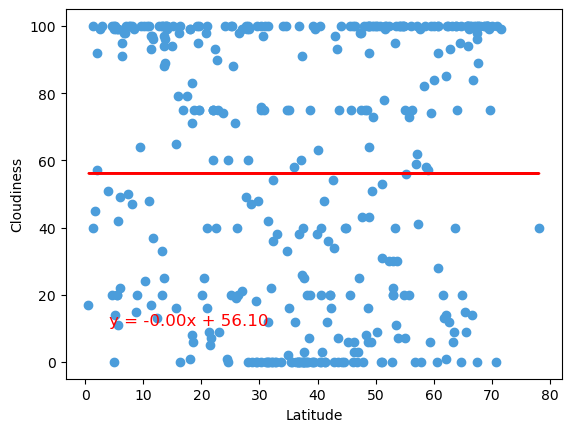

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Northern_Hemi_Cloudiness_vs_Latitude.png")

r = -0.18


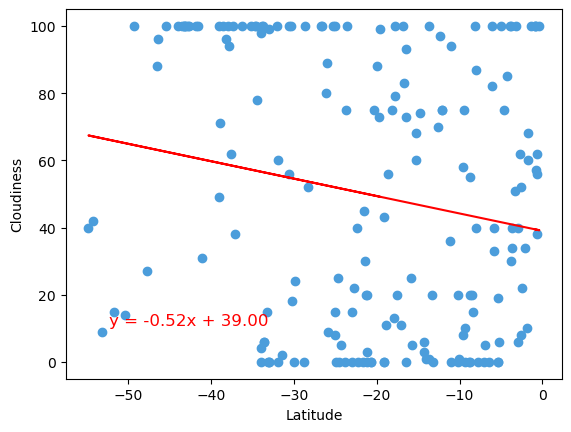

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Southern_Hemi_Cloudiness_vs_Latitude.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, the correlation is zero, while in the Southern Hemisphere, there is a weak inverse correlation, but still not strong enough to be a reliable predictor of cloudiness based solely on latitude. In the Northern Hemisphere, the correlation is zero, while in the Southern Hemisphere, there is a weak inverse correlation, but still, it is not strong enough to be a reliable predictor of cloudiness based only on latitude. That is, in the north, value is zero, which tells us that there is no significant linear relationship between the amount of cloudiness and latitude in the Northern Hemisphere and therefore it is not a reliable predictor of cloudiness in this region, in the case of the south there is an inverse correlation, that is, as the latitude increases, the amount of cloudiness tends to decrease in the Southern Hemisphere. However, since the absolute 
value of r is relatively low (0.18), the linear relationship is still weak and again is not a reliable method of predicting.

### Wind Speed vs. Latitude Linear Regression Plot

r = -0.20


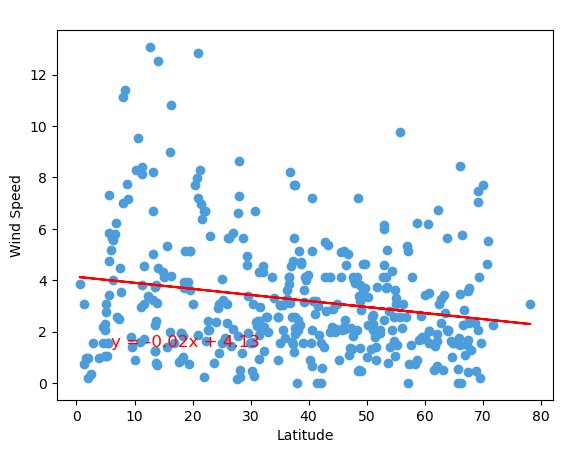

In [26]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", " ", "../output_data/Northern_Hemi_Wind_Speed_vs_Latitude.png")

r = -0.09


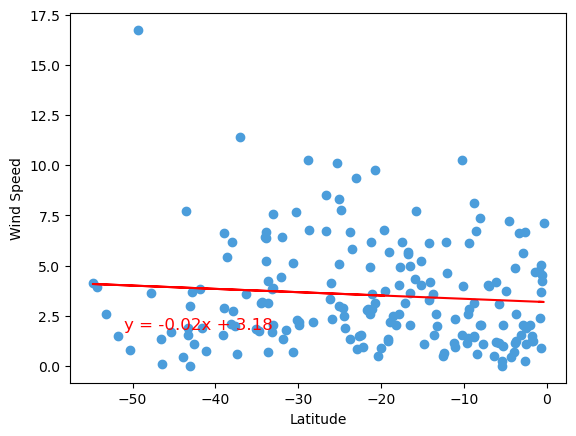

In [27]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "", "../output_data/Southern_Hemi_Wind_Speed_vs_Latitude.png")

**Discussion about the linear relationship:** Both north and south in this case, it is an inverse correlation, that is, as the latitude increases the wind speed tends to decrease in both cases, but the correlation is still very weak, therefore it is not strong enough to make accurate predictions based only on latitude.